<h2>Q2:由參與者的學習年份與同理心的相關性，來探討讀醫學系是否會增加同理心</h2>

In [1]:
# modules we'll use
import pandas as pd
import numpy as np
import seaborn as sb
import scipy.stats
import statsmodels.stats.weightstats
import matplotlib.pyplot as plt
# read in our data
med_df = pd.read_csv("C:/Users/ASUS/Desktop/Data Carrard et al. 2022 MedTeach.csv")
#med_df

<h2>描述統計</h2>

學習年份和同理心的相關係數table為:
               year  erec_mean
year       1.000000   0.080132
erec_mean  0.080132   1.000000


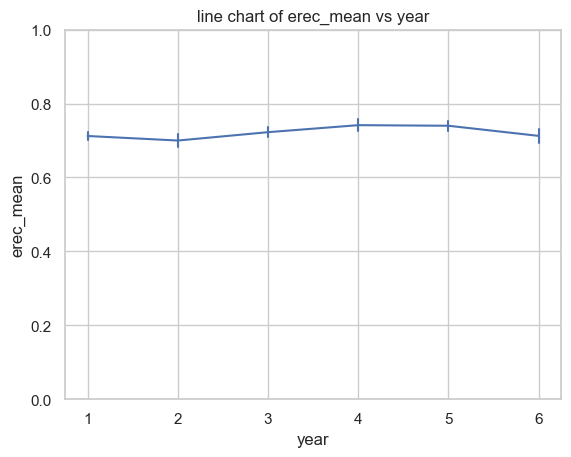

In [2]:
#首先，從圖直觀的獲取資訊
sb.set(style="whitegrid")
categorical = med_df[['year', 'erec_mean']].copy()
ax = sb.lineplot(data = med_df,x=med_df['year'], y= med_df['erec_mean'],err_style='bars',linewidth=1.5)
ax.set(ylim=(0, 1))
ax.set_title("line chart of erec_mean vs year")
#學習年份和同理心的相關係數
print(f'學習年份和同理心的相關係數table為:\n{categorical.corr()}')


<h3>直觀的從圖中得知，隨著學習年份的增加，同理心似乎沒有大幅度的增加</h3>

<h3>他們之間的相關係數，也相當低</h3>

--------

<h3>首先，我們取出 "學習年份1年~學習年份6年與同理心" 的資料，再利用圖表觀察</h3>

In [3]:
#讀取學習年份1年~6年和同理心的資料
erec1_df = med_df['erec_mean'].loc[med_df['year']==1]
erec2_df = med_df['erec_mean'].loc[med_df['year']==2]
erec3_df = med_df['erec_mean'].loc[med_df['year']==3]
erec4_df = med_df['erec_mean'].loc[med_df['year']==4]
erec5_df = med_df['erec_mean'].loc[med_df['year']==5]
erec6_df = med_df['erec_mean'].loc[med_df['year']==6]
print(f'學習年份為1年的描述統計:')
print(erec1_df.describe())
print(f'學習年份為2年的描述統計:')
print(erec2_df.describe())
print(f'學習年份為3年的描述統計:')
print(erec3_df.describe())
print(f'學習年份為4年的描述統計:')
print(erec4_df.describe())
print(f'學習年份為5年的描述統計:')
print(erec5_df.describe())
print(f'學習年份為6年的描述統計:')
print(erec6_df.describe())

學習年份為1年的描述統計:
count    245.000000
mean       0.712245
std        0.094739
min        0.357143
25%        0.642857
50%        0.714286
75%        0.785714
max        0.904762
Name: erec_mean, dtype: float64
學習年份為2年的描述統計:
count    135.000000
mean       0.700000
std        0.098865
min        0.404762
25%        0.619048
50%        0.714286
75%        0.785714
max        0.880952
Name: erec_mean, dtype: float64
學習年份為3年的描述統計:
count    143.000000
mean       0.722611
std        0.079835
min        0.547619
25%        0.666667
50%        0.714286
75%        0.785714
max        0.928571
Name: erec_mean, dtype: float64
學習年份為4年的描述統計:
count    123.000000
mean       0.741580
std        0.099471
min        0.428571
25%        0.690476
50%        0.738095
75%        0.809524
max        0.952381
Name: erec_mean, dtype: float64
學習年份為5年的描述統計:
count    127.000000
mean       0.739970
std        0.078831
min        0.547619
25%        0.690476
50%        0.738095
75%        0.809524
max        0.904762
Na

|  資料 \ 信息  | count  |  mean    | std    |  min  | 25%     |  50%     | 75%  | max  |
|  ----  | ----  |  ----   | ----   | ----   |----     |----      |----   |----    |
| 學習年份為1年的同理心  | 245 | 0.7122  | 0.0947 |0.3571   |  0.6428  |  0.7143|0.7857 | 0.9048  | 
| 學習年份為2年的同理心  | 135 | 0.7  | 0.0989 | 0.4047  |0.6190  |0.7143     |0.7857 |0.889 |
| 學習年份為3年的同理心  | 143 | 0.7226  | 0.0798 | 0.5476  |0.6667   |0.7143     |0.7857 |0.9286 |
| 學習年份為4年的同理心  | 123 | 0.7416  | 0.0995 | 0.4286  |0.6905   |0.7381   |0.8095 |0.9524 |
| 學習年份為5年的同理心  | 127 | 0.7399  | 0.0788 | 0.5476  |0.6905   |0.7381    |0.8095 |0.9048 |
| 學習年份為6年的同理心  | 113 | 0.7126  | 0.1021 | 0.4047  |0.6428   |0.7381     |0.7857 |0.9048 |



[(0.2, 1.0)]

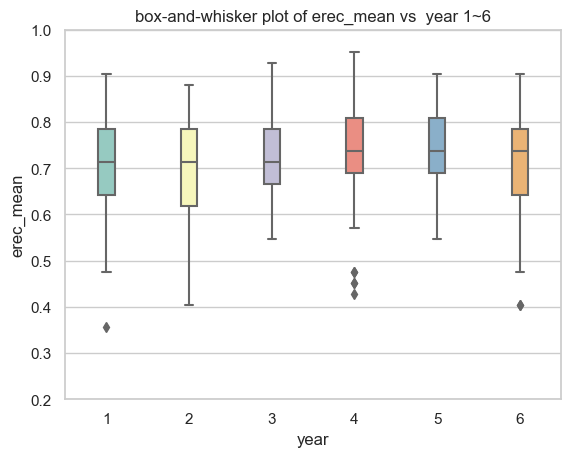

In [5]:
year_1_to_6_df = med_df.copy()
year_1_to_6_df
#data visualization
sb.set(style="whitegrid")
ax = sb.boxplot(x = "year", y = "erec_mean", data = year_1_to_6_df, width=0.2, palette="Set3")
ax.set_title("box-and-whisker plot of erec_mean vs  year 1~6")
ax.set(ylim=(0.2, 1))

<h3>學習年份1年~學習年份6年的醫學生，同理心數值的分布並沒有差異太大</h3>

-------------------
<h2>檢定統計</h2>

<h3>首先，檢查資料是否為常態分布 (H0:資料為常態分佈 vs H1:資料非常態分布):</h3>

In [29]:
print(scipy.stats.normaltest(erec1_df))
print(scipy.stats.normaltest(erec2_df))
print(scipy.stats.normaltest(erec3_df))
print(scipy.stats.normaltest(erec4_df))
print(scipy.stats.normaltest(erec5_df))
print(scipy.stats.normaltest(erec6_df))

NormaltestResult(statistic=3.0187093797347115, pvalue=0.22105257941269038)
NormaltestResult(statistic=5.246979028800002, pvalue=0.07254925892381314)
NormaltestResult(statistic=0.47522049228634383, pvalue=0.7885099560075395)
NormaltestResult(statistic=13.941452696071309, pvalue=0.0009389706386054727)
NormaltestResult(statistic=2.3675959350152023, pvalue=0.3061139173130186)
NormaltestResult(statistic=5.753983139849085, pvalue=0.05630389462594448)


<h3>
就讀1年的資料: p-value=0.22105257941269038 > 0.05，我們不棄卻H0，所以資料是常態分佈。
</h3>
<h3>
就讀2年的資料: p-value=0.07254925892381314 > 0.05，我們不棄卻H0，所以資料是常態分佈。
</h3>
<h3>
就讀3年的資料: p-value=0.7885099560075395 > 0.05，我們不棄卻H0，所以資料是常態分佈。
</h3>
<h3>
就讀4年的資料: p-value=0.0009389706386054727 < 0.05，我們棄卻H0，所以不是常態分佈。
</h3>
<h3>
就讀5年的資料: p-value=0.3061139173130186 > 0.05，我們不棄卻H0，所以資料是常態分佈。
</h3>
<h3>
就讀6年的資料: p-value=0.05630389462594448 > 0.05，我們不棄卻H0，所以資料是常態分佈。
</h3>

<h3>因為有資料不是常態分佈，所以使用non-parametric Kruskal-Wallis H-test</h3>
註: 無母數(non-parametric)分析資料不需為常態分布，也不需檢查資料是否為相同變異數

H0: 學習年份多寡對同理心數值無顯著影響

H1: 學習年份多寡對同理心數值有顯著影響

In [27]:
scipy.stats.kruskal (erec1_df, erec2_df, erec3_df, erec4_df, erec5_df, erec6_df)

KruskalResult(statistic=19.405884598529678, pvalue=0.0016146011890200826)

------------------
<h2>結論</h2>
<h3>根據Kruskal-Wallis H-test的結果，
p-value = 0.0016146011890200826 < 0.05，棄卻H0

表示在這6組的同理心數值有顯著差異。
因此在顯著水準為0.05的情況下，學習年份多寡會影響同理心

Insight: 儘管就讀於課業繁重的醫學系，隨著學習資歷的增長，醫學生也是能從長時間的課程和實作中，增加同理心。
</h3>